# Final ProjectDraft1
### Rishi Gummakonda - BIS 397, Spring 2021

## Introduction:
<p>Basketball is my favorite sport. At its core, its a game for kids. But to me, and so many people, its a lot more. Everything about it is capitvating: the offense, the defense, the personalities, the culture, and especially the passion. I could go on and on. Even though I was never blessed with the physical gifts or work ethic to take my playing skills anywhere besides the driveway or the local park, it would still be a dream to go to the NBA. </p>

A couple of years ago I found the website for the [2019 NBA Hackathon](https://hackathon.nba.com). The hackathon has two prompts, one for basketball analytics, another for business. This project will be based on the business prompt from the 2019 NBA Hackathon. 

The business prompt and dataset were originally on the hackathon's webpage but have since been removed. Even though I never ended up enrolling in the competition, I downloaded all the prompts and datasets. The original business prompt can be found [here](https://drive.google.com/file/d/1sXCpQhgL0pvTSDY_grhz1EN7ItBLPB0a/view?usp=sharing).

The NBA complied in a training dataset of 7,766 (real) Instagram posts by @nba starting from 10/01/2017 (1,595 individual photos, 713 photo albums, and 5,458 videos). 

The training set can be found [here](https://drive.google.com/file/d/1nljN5HI6Sb7YTegEUF0CSzl3bPLg7wR3/view?usp=sharing).

In [1]:
#Import pandas to read in dataset
import pandas as pd
import numpy as np

In [2]:
#Read in training set 
training = pd.read_csv('/Users/rishigummakonda/Desktop/BIS 397/final/training_set.csv',encoding='mac_roman')
training = training.rename(columns={"Followers at Posting": "followers"})

In [3]:
training.head()

,Engagements,followers,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


<ol>
<li>Engagements: Instagram "engagement" numbers are the sum of likes, comments, and saves on a certain post. According to the NBA, the engagement numbers are not real, they are artficially generated.There’s no (intentional) correlation with the real-life engagement totals belonging to posts by @nba.</li>
<li>Followers at Posting: number of followers at the time of posting</li>
<li>Created: Datetime stamp of post (Eastern time)</li>
<li>Type: Classification of post as Individual Photo, Photo Album, or Video</li>
<li>Description: @nba‘s post caption / description</li>
</ol>

<p> The data provided can provide many insights regarding what makes NBA instagram posts popular or unpopular. Using AI to determine the factors that drive engagement allows the NBA to be more efficent with their marketing. With the insights, they can tailor their strategy to make mosts more engaging, and ultimately boost the NBA brand.  Instagram is especially great for advertisting a product. AI can play a powerful role in marketing, and the NBA should utilize it to its benefit.</p>

<p> There are many factors that may drive a post engagement that are not included within the dataset. There may be specific events or time periods that may drive or stifle engagement, or determine the kind of posts the NBA chooses to display. For example, when Kobe Bryant suddenly died over a year ago, the NBA's instagram centered around his legacy. This defintely effected engagement numbers abnormally. This would be a greater issue if the engagement numbers given by the NBA were not artificially generated. However, because engagements are artifically generated, it can be assumed that any other factors that may drive engagement are not relevant.</p>

## Detailed Description:

<p> The numerical variables are Engagments, and Followers at Posting. Categorical variables are Created, Type, and Description. To analyze Created, the data needs to be transformed from a DateTime object into smaller categories. For example, it may be able to be broken down into the numerical following: day of the week (1 to 7), hour and month. To analyze Type, the data can be transformed from the three types to numerical representations (1, 2, 3). Description can be analyzed through sentiment analysis. Other numerical data can be gathered from the descriptions such as length, types of characters used, and if the account is tagged.

In [4]:
training['Created'] = pd.to_datetime(training['Created'])
training['month'] = training.Created.dt.month
training['weekday'] = training.Created.dt.weekday
training['hour'] = training.Created.dt.hour
training.dtypes

Engagements                        int64
followers                          int64
Created        datetime64[ns, tzlocal()]
Type                              object
Description                       object
month                              int64
weekday                            int64
hour                               int64
dtype: object

In [5]:
dummies= pd.get_dummies(training.drop(['Description'],axis=1))
training['isAlbum']= dummies['Type_Album']
training['isPhoto']= dummies['Type_Photo']
training['isVideo']= dummies['Type_Video']

In [6]:
#length of description
training['len_des'] = training['Description'].str.len()

In [7]:
training['tags'] = training['Description'].str.count("@")
training.tags.value_counts().head()*100/7766

2.0    35.745558
1.0    30.775174
0.0    19.456606
3.0     8.910636
4.0     3.322174
Name: tags, dtype: float64

In [8]:
training['count_nba_wnba'] = training['Description'].str.count('@nba') + training['Description'].str.count('@wnba')
training.count_nba_wnba.value_counts()*100/7766

0.0    85.642544
1.0    13.868143
2.0     0.296163
3.0     0.012877
Name: count_nba_wnba, dtype: float64

In [9]:
training['emojis'] = training['Description'].str.count('\ ?? ')
training.emojis.value_counts().head()*100/7766

6.0    9.541592
7.0    8.511460
8.0    8.112284
5.0    8.086531
9.0    7.584342
Name: emojis, dtype: float64

In [10]:
training['kyrie'] = training['Description'].str.count('@kyrieirving')
training['demar'] =training['Description'].str.count('@demar_derozan')
training['lebron'] = training['Description'].str.count('@kingjames')
training['jimmy'] = training['Description'].str.count('@jimmybutler')
training['giannis'] = training['Description'].str.count('@giannis_an34')
training['joel'] = training['Description'].str.count('@joelembiid')
training['kemba'] = training['Description'].str.count('@_kw15')
training['steph'] = training['Description'].str.count('@stephencurry30')
training['harden'] =training['Description'].str.count('@jharden13')
training['kd'] = training['Description'].str.count('@easymoneysniper')
#training['kawhi'] = training['Description'].str.count('kawhi')
training['ad'] = training['Description'].str.count('@antdavis23')
training['boogie'] = training['Description'].str.count('@boogiecousins')
training['pg13'] = training['Description'].str.count('@ygtrece')

In [11]:
training['east2018'] = training['kyrie'] + training['demar'] + training['lebron'] + training['joel'] + training['giannis']
training.east2018.value_counts()*100/7766

0.0    88.037600
1.0    11.601854
2.0     0.180273
Name: east2018, dtype: float64

In [12]:
training['east2019'] = training['kyrie'] + training['kemba'] + training['joel'] + training['giannis']
training.east2019.value_counts()*100/7766

0.0    93.497296
1.0     6.219418
2.0     0.103013
Name: east2019, dtype: float64

In [13]:
training['west2018'] = training['steph'] + training['harden'] + training['kd']  + training['ad'] + training['boogie']
training.west2018.value_counts()*100/7766

0.0    92.093742
1.0     7.507082
2.0     0.218903
Name: west2018, dtype: float64

In [14]:
training['west2019'] = training['steph'] + training['harden'] + training['kd']  + training['lebron'] + training['pg13']
training.west2019.value_counts()*100/7766

0.0    87.071852
1.0    12.503219
2.0     0.244656
Name: west2019, dtype: float64

In [15]:
training['topFive18'] = training['steph'] + training['lebron'] + training['kd']  + training['giannis'] + training['kyrie']+ training['joel']
training.topFive18.value_counts()*100/7766

0.0    85.166109
1.0    14.202936
2.0     0.437806
3.0     0.012877
Name: topFive18, dtype: float64

In [16]:
training['stars'] = training['topFive18'] +  + training['ad'] + training['boogie']+ training['pg13'] + training['harden'] + training['demar']+training['kemba']+training['jimmy']+training['pg13']+training['boogie']
training.stars.value_counts()*100/7766

0.0    78.817924
1.0    18.915787
2.0     1.931496
3.0     0.154520
Name: stars, dtype: float64

In [17]:
training.sort_values("Engagements", ascending = False)

,Engagements,followers,Created,Type,Description,month,weekday,hour,isAlbum,isPhoto,...,kd,ad,boogie,pg13,east2018,east2019,west2018,west2019,topFive18,stars
5921,1129585,26873604,2018-02-18 19:59:49-05:00,Video,The captains meet for pregame #NBAAllStar talk...,2,6,19,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
3699,1077014,30719053,2018-09-16 12:06:15-04:00,Video,30 days from #KiaTipOff18... we flashback to @...,9,6,12,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3876,1075434,30047470,2018-08-11 20:55:20-04:00,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAA...,8,5,20,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
5901,1067990,26873604,2018-02-18 23:32:14-05:00,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAl...,2,6,23,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3762,1066099,30442523,2018-09-01 12:18:40-04:00,Video,Coming in at No.5...@kyrieirving SOMEHOW finds...,9,5,12,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,159402,31026589,2018-09-30 16:48:19-04:00,Photo,?? 3rd straight @FIBA World Cup Gold Medal ??\...,9,6,16,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3934,154757,29876355,2018-08-04 00:33:09-04:00,Photo,Representing #TeamWORLD in the 2018 #NBAAfrica...,8,5,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3713,154556,30586755,2018-09-09 14:10:31-04:00,Photo,Congratulations to the @lvaces' @aja22wilson o...,9,6,14,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3789,143702,30321656,2018-08-26 10:39:01-04:00,Photo,@breannastewart30 of the @seattlestorm named 2...,8,6,10,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
training.Type.value_counts()

Video    5458
Photo    1595
Album     713
Name: Type, dtype: int64

In [19]:
print("Percentage of Total Dataset:")
print((training.Type.value_counts()*100/7766).round(2))

Percentage of Total Dataset:
Video    70.28
Photo    20.54
Album     9.18
Name: Type, dtype: float64


In [20]:
print("Average Video Followers at Posting:",np.mean(training[training['Type']=='Video']['followers']))
print("Average Photo Followers at Posting:",np.mean(training[training['Type']=='Photo']['followers']))
print("Average Album Followers at Posting:",np.mean(training[training['Type']=='Album']['followers']))

Average Video Followers at Posting: 30340952.7425797
Average Photo Followers at Posting: 30551143.04952978
Average Album Followers at Posting: 30815575.74053296


In [21]:
print("Average Video Length of Description:",np.mean(training[training['Type']=='Video']['len_des']))
print("Average Photo Length of Description:",np.mean(training[training['Type']=='Photo']['len_des']))
print("Average Album Length of Description:",np.mean(training[training['Type']=='Album']['len_des']))

Average Video Length of Description: 65.7011557512383
Average Photo Length of Description: 79.63413098236776
Average Album Length of Description: 72.47826086956522


In [22]:
print("Average Video Engagements:",np.mean(training[training['Type']=='Video']['Engagements']))
print("Average Photo Engagements:",np.mean(training[training['Type']=='Photo']['Engagements']))
print("Average Album Engagements:",np.mean(training[training['Type']=='Album']['Engagements']))

Average Video Engagements: 692773.5756687431
Average Photo Engagements: 357547.36363636365
Average Album Engagements: 348465.3394109397


In [23]:
training.describe()

,Engagements,followers,month,weekday,hour,isAlbum,isPhoto,isVideo,len_des,tags,...,kd,ad,boogie,pg13,east2018,east2019,west2018,west2019,topFive18,stars
count,7.766000e+03,7.766000e+03,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.00000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,5.923129e+05,3.042770e+07,5.996652,3.081767,15.925444,0.091810,0.205382,0.702807,69.178664,1.511739,...,0.008772,0.009030,0.004128,0.009804,0.11984,0.064370,0.079592,0.130160,0.151445,0.232843
std,1.792682e+05,3.748957e+06,3.910491,1.970062,7.319283,0.288777,0.404007,0.457052,37.060662,1.123340,...,0.093253,0.094602,0.064121,0.098535,0.33031,0.249598,0.278664,0.343709,0.371582,0.476071
min,1.278160e+05,2.487554e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173900e+05,2.698910e+07,3.000000,1.000000,12.000000,0.000000,0.000000,0.000000,44.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.397285e+05,3.004747e+07,5.000000,3.000000,19.000000,0.000000,0.000000,1.000000,63.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.216282e+05,3.392854e+07,10.000000,5.000000,21.000000,0.000000,0.000000,1.000000,88.250000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129585e+06,3.698468e+07,12.000000,6.000000,23.000000,1.000000,1.000000,1.000000,639.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,2.000000,2.000000,3.000000,3.000000


In [24]:
#basic data visualization of Type of posts vs. Engagement
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

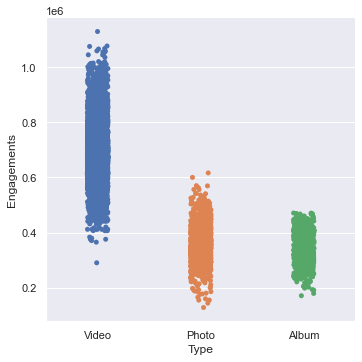

In [25]:
sns.catplot(x="Type", y="Engagements", data=training)

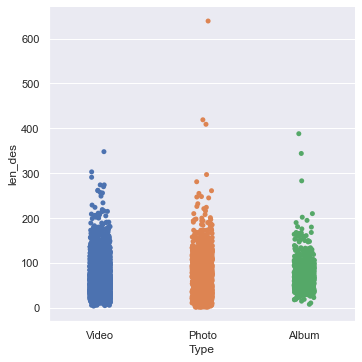

In [26]:
sns.catplot(x="Type", y="len_des", data=training)

Engagements  isPhoto     -0.665827
             isAlbum     -0.432515
             len_des     -0.276022
             emojis      -0.246733
             stars        0.249690
             lebron       0.249850
             west2019     0.251167
             east2018     0.257968
             topFive18    0.287841
             isVideo      0.861826
dtype: float64
isPhoto      isVideo       -0.781810
isVideo      isPhoto       -0.781810
isPhoto      Engagements   -0.665827
Engagements  isPhoto       -0.665827
kyrie        east2019       0.550849
east2019     kyrie          0.550849
topFive18    lebron         0.565312
lebron       topFive18      0.565312
west2018     stars          0.565349
stars        west2018       0.565349
west2018     harden         0.574585
harden       west2018       0.574585
topFive18    east2019       0.576498
east2019     topFive18      0.576498
west2018     steph          0.599425
steph        west2018       0.599425
giannis      east2019       0.618919
east20

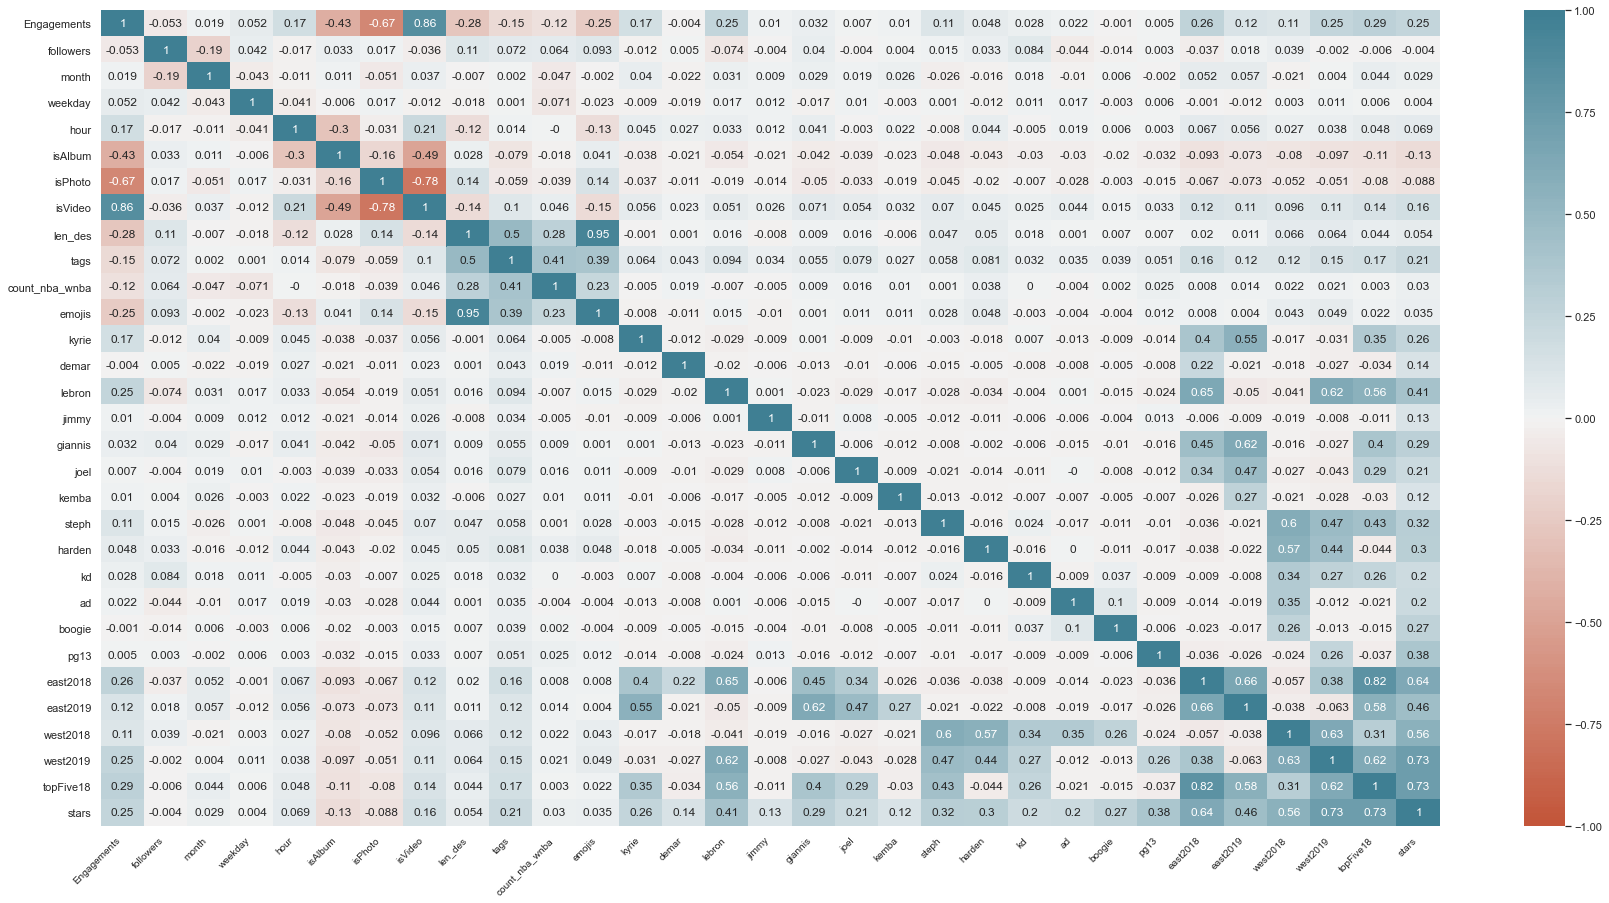

In [27]:
plt.figure(figsize=(30,15))
ax3 = sns.heatmap(training.corr().round(3),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), 
                  square=False, annot=True, annot_kws={"size": 12})

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10);

#listing the correlation values
correlation_mat = training.corr()

corr_pairs = correlation_mat.unstack()

#sorting
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#only looking at pairs that go with total revenue
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.245][['Engagements']]
strong_pairs_no1 = strong_pairs[abs(sorted_pairs) < 1]
print(strong_pairs_no1)

#only looking at pairs that go with total revenue
strong_pairs2 = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs_no2 = strong_pairs2[abs(sorted_pairs) < 1]
print(strong_pairs_no2)

<AxesSubplot:xlabel='month', ylabel='Engagements'>

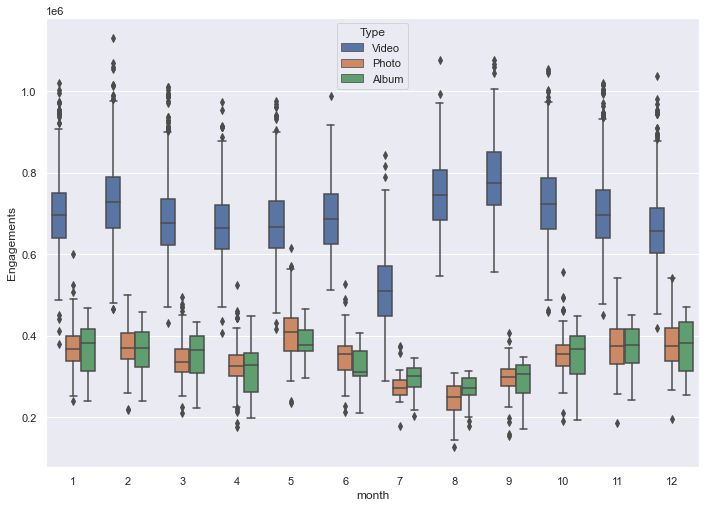

In [28]:
sns.boxplot(x="month", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='weekday', ylabel='Engagements'>

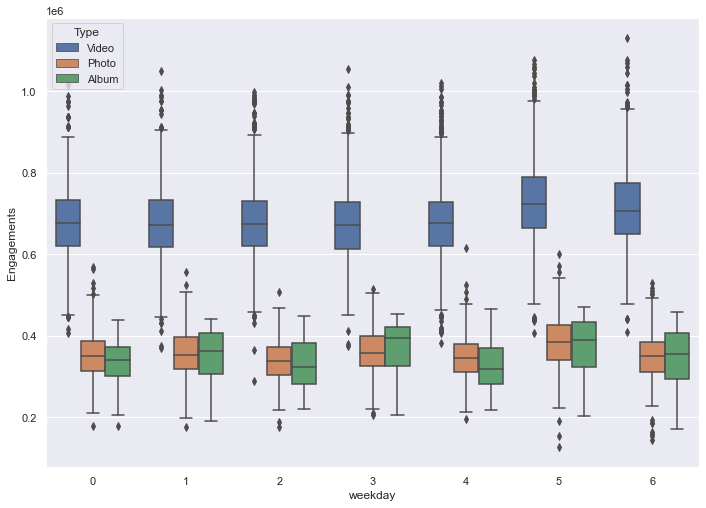

In [29]:
sns.boxplot(x="weekday", y="Engagements", data=training, hue="Type")

<AxesSubplot:xlabel='hour', ylabel='Engagements'>

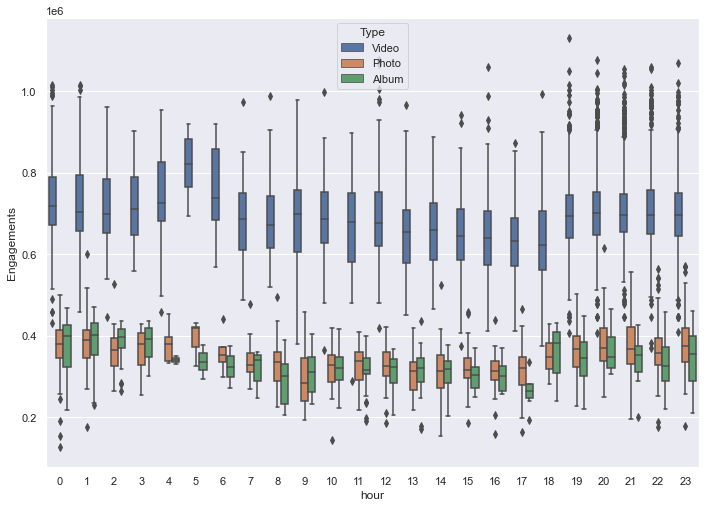

In [30]:
sns.boxplot(x="hour", y="Engagements", data=training, hue="Type")

The two graphs above demonstrate that there seems to be higher engagement on every kind of post in between hours of 18:00 to 1:00 relative to all other hours. This does not defintely indicate correlation between time of post and quality of post as those are also the hours where the NBA has the most games live on TV.

This correlation matrix displays that none of the numerical factors have high correlation to Engagement. The highest correlation is the hour it is posted, although it is weak.

<AxesSubplot:xlabel='followers', ylabel='Engagements'>

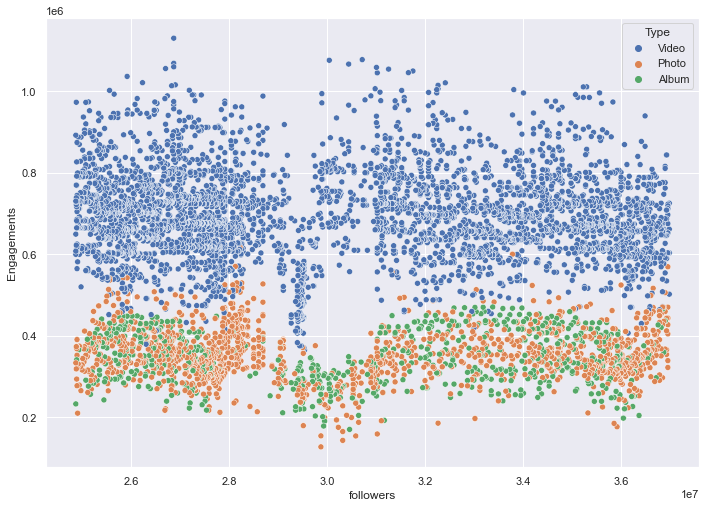

In [31]:
sns.scatterplot(x="followers", y="Engagements", hue="Type", data=training)

<AxesSubplot:xlabel='len_des', ylabel='Engagements'>

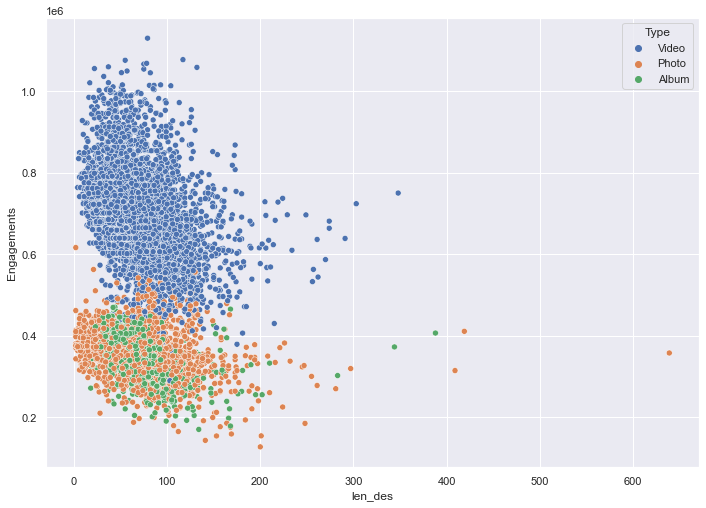

In [32]:
sns.scatterplot(x="len_des", y="Engagements", hue="Type", data=training)

These graphs display that Videos have higher engagement numbers compared to Photos and Albums. Photos and Albums generally have similar engagement numbers. This patterns holds true as number of followers increase and time posted varies.

<AxesSubplot:xlabel='Engagements', ylabel='Created'>

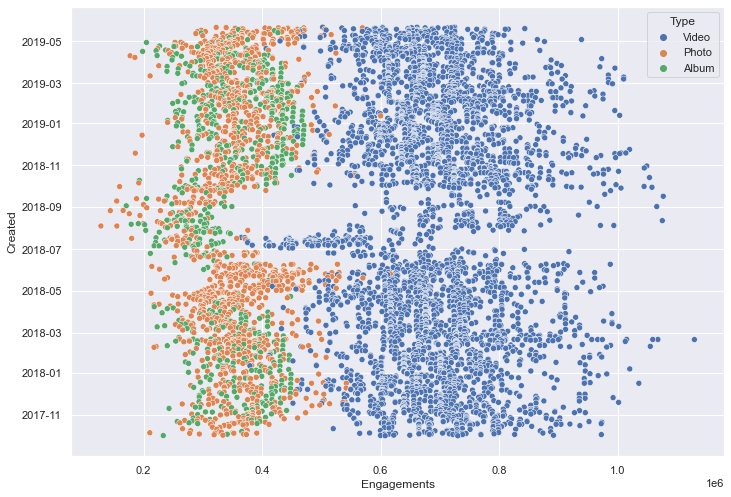

In [33]:
sns.scatterplot(x="Engagements", y="Created", hue= "Type", data=training)

## AI Business Question:

### Question 1 - the original prompt: 
**Can we accurately predict Engagment numbers for a random sample of a 1000 NBA instagram posts given the number of Followers, Type of post, time posted, and caption descriptions?**

The original prompt asks the contestant to predict the Engagements for each of the 1000 posts in the holdout set. The training set can be used to train the models so the models can get accurate results on the test set. This can be done through regression models, particularly linear regression. The success measure of choice is Mean Absolute Percentage Error (MAPE) on Engagements. A description is below:

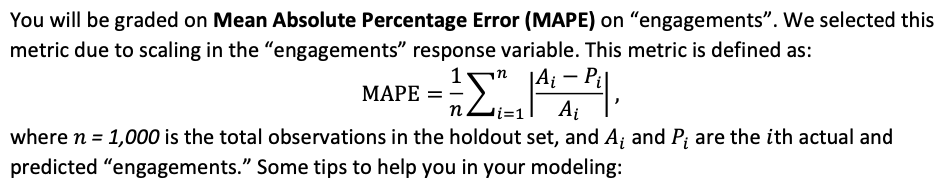

<p>All of the numerical features can be used for this prompt. Categorical varibles can be transformed to numerical representations. This is demonstrated above as the Created datetime value was changed to be represented by indivual month, hour and day of the week. In this scenario, Engagements would be the target varible (dependent variable). All others would be independent variables.</p>

**A subquestion within this prompt is: Can we determine what the optimal features are for an Instagram post?** This may be difficult to answer because there are many variables within the real world that may drive Instagram engagement.

## Modeling

In [34]:
import sklearn
from sklearn import metrics
from sklearn.metrics import (explained_variance_score,r2_score) 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [35]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [36]:
def linReg(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
    lm = LinearRegression(fit_intercept=True)
    lm.fit(X_train, y_train)
    actual = list(y_test)
    predicted = list(lm.predict(X_test))
    print('Number of coefficients: {}'.format(len(lm.coef_)))
    print("MAPE:",mean_absolute_percentage_error(actual,predicted).round(2))
    print(pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']])

In [37]:
training= training.fillna(0)
y = training['Engagements']
x = training[['followers','month','weekday','hour','isPhoto','isAlbum','isVideo']]
linReg(x,y)

Number of coefficients: 7
MAPE: 12.5
    features  estimatedCoefficients
0  followers              -0.001436
1      month            -619.468020
2    weekday            5790.361108
3       hour            -425.965374
4    isPhoto         -109412.546090
5    isAlbum         -118124.261787
6    isVideo          227536.807877


In [38]:
training['len_des'] = training['len_des'].fillna(0)
y = training['Engagements']
x = training[["isAlbum","isPhoto","isVideo"]]
linReg(x,y)

Number of coefficients: 3
MAPE: 12.54
  features  estimatedCoefficients
0  isAlbum           8.392965e+17
1  isPhoto           8.392965e+17
2  isVideo           8.392965e+17


In [39]:
training = training.fillna(0)
y = training['Engagements']
x = training[['len_des', "tags", "count_nba_wnba", "topFive18", "emojis"]]
linReg(x,y)

Number of coefficients: 5
MAPE: 30.05
         features  estimatedCoefficients
0         len_des           -1801.163953
1            tags          -10573.775110
2  count_nba_wnba           -7393.402460
3       topFive18          146775.088756
4          emojis            4213.691005


In [40]:
training = training.fillna(0)
y = training['Engagements']
x = training[['len_des', "tags", "count_nba_wnba", "topFive18","isPhoto", "isAlbum"]]
linReg(x,y)

Number of coefficients: 6
MAPE: 9.8
         features  estimatedCoefficients
0         len_des            -103.646642
1            tags          -39513.220237
2  count_nba_wnba          -22543.460205
3       topFive18          101154.661535
4         isPhoto         -333672.380215
5         isAlbum         -343051.605660


In [41]:
training['len_des'] = training['len_des'].fillna(0)
y = training['Engagements']
x = training[['month','hour','isPhoto','isAlbum','len_des', "tags", "count_nba_wnba", "topFive18"]]
linReg(x,y)

Number of coefficients: 8
MAPE: 9.72
         features  estimatedCoefficients
0           month           -1110.297333
1            hour            -611.757856
2         isPhoto         -334674.724249
3         isAlbum         -347588.834322
4         len_des            -120.280020
5            tags          -39255.617654
6  count_nba_wnba          -22996.462296
7       topFive18          101640.334659


In [42]:
training['len_des'] = training['len_des'].fillna(0)
y = training['Engagements']
x = training[['month','hour','isPhoto','isAlbum','len_des', "tags", "count_nba_wnba", "topFive18", "weekday"]]
linReg(x,y)

Number of coefficients: 9
MAPE: 9.64
         features  estimatedCoefficients
0           month            -991.613368
1            hour            -543.829459
2         isPhoto         -335184.380430
3         isAlbum         -347487.588938
4         len_des            -115.028854
5            tags          -39659.606953
6  count_nba_wnba          -20664.866105
7       topFive18          101498.059041
8         weekday            5247.783138


In [43]:
training['len_des'] = training['len_des'].fillna(0)
y = training['Engagements']
x = training[['month','hour','isVideo','len_des', "tags", "count_nba_wnba", "topFive18", "weekday"]]
linReg(x,y)

Number of coefficients: 8
MAPE: 9.62
         features  estimatedCoefficients
0           month           -1013.734170
1            hour            -443.512176
2         isVideo          338575.312203
3         len_des            -108.436207
4            tags          -39643.391281
5  count_nba_wnba          -20878.216330
6       topFive18          101769.044390
7         weekday            5269.660537


## Conclusion

In [44]:
#Write here

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

training= training.fillna(0)
y = training['Engagements']
x = training.drop(['Engagements','Created', 'Description', "Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
actual = list(y_test)
predicted = list(lm.predict(X_test))

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    fss = (i, fs.scores_[i])
    print('Feature %d: %f' % fss)
    

Feature 0: 30.256291
Feature 1: 1.553005
Feature 2: 11.276477
Feature 3: 150.379946
Feature 4: 1174.111269
Feature 5: 4534.329338
Feature 6: 15655.529672
Feature 7: 437.999977
Feature 8: 134.313916
Feature 9: 81.127892
Feature 10: 349.567419
Feature 11: 131.140952
Feature 12: 0.062502
Feature 13: 353.176379
Feature 14: 1.112659
Feature 15: 9.315648
Feature 16: 0.031728
Feature 17: 0.008877
Feature 18: 70.344254
Feature 19: 10.983266
Feature 20: 1.593411
Feature 21: 3.739691
Feature 22: 0.005561
Feature 23: 0.178946
Feature 24: 371.149098
Feature 25: 68.461520
Feature 26: 64.602329
Feature 27: 347.227661
Feature 28: 462.289029
Feature 29: 340.516430


In [46]:
training= training.fillna(0)
y = training['Engagements']
x = training.drop(['Engagements','Created', 'Description', "Type"], axis=1)
linReg(x,y)

Number of coefficients: 30
MAPE: 8.75
          features  estimatedCoefficients
0        followers               0.000470
1            month            -852.984346
2          weekday            5129.867706
3             hour            -660.937543
4          isAlbum         -120537.367019
5          isPhoto         -108571.377239
6          isVideo          229108.744340
7          len_des            -303.606590
8             tags          -39779.998469
9   count_nba_wnba          -19951.980505
10          emojis            1241.614235
11           kyrie          124226.596977
12           demar          -42012.137088
13          lebron           85828.851334
14           jimmy            -301.118155
15         giannis          -61733.217974
16            joel          -72078.892385
17           kemba             155.607032
18           steph            4105.973489
19          harden           19248.490084
20              kd          -44703.825588
21              ad           -2141.651

In [49]:
training= training.fillna(0)
y = training['Engagements']
x = training[['month','weekday','hour','isVideo','isPhoto','isAlbum','len_des','tags','count_nba_wnba','emojis','steph','lebron','kyrie']]
linReg(x,y)

Number of coefficients: 13
MAPE: 8.82
          features  estimatedCoefficients
0            month           -1003.238516
1          weekday            5066.566341
2             hour            -626.352774
3          isVideo          229276.955321
4          isPhoto         -108390.312783
5          isAlbum         -120886.642538
6          len_des            -294.418401
7             tags          -39447.679999
8   count_nba_wnba          -19513.809451
9           emojis            1271.770135
10           steph           69913.496747
11          lebron          187779.735022
12           kyrie          179249.134996
